<h3>Theoretical Framework: Higher Education Affordability vs. Economic Strength Index (HEAEI)</h3>

<h5>Introduction and Justification of this Index</h5>
<p> In 2025 there are many countries around the world, including Ireland which are facing a cost of living crisis. The cost of most things has risen, including higher education, which is making it harder for students worldwide to access. Tution fees have increased by approx 460% over the past 50 years, which has even outpaced inflation, according to (WGU, 2022). Whil some nations do offer free or a lower-cost education, other countries charge extreme and I think this will be interesting to compare.</p>
<p> I want to look at this issue in a way that takes in realistic economic factors, aswell as information on universities in order to paint a more accurate picture to create this index.I will be comparing my higher education data to a country's economic strength (their GDP per capita). If I was to only consider the university data, I would not be able to properly analyse and visualise this data, and tell if a universities tution fees accuratly represents a countries econmic status.</p>

<h5>Purpose of this Composite Index</h5>
<p> The Higher Education Affordability vs. Economic Strength Index (HEAEI) will be aiming to rank countries based on the affordability of the higher education systems, relative to their economic capacity, which is defind as "The amount an economy can produce using current capital at full tilt" () . There will be multiple factors combined and compared in this Index, which will allow me to easily comapre various countries for the best outcome.
<h5>The main goals of the HEAEI Index</h5>
<ul>
<li> To find which countries offer the most affordable education based on their economic capacity</li>
<li>Identify countries where the tution fees are much higher when compared to GDP per capita.</li>
</ul>

This index will be created using two datasets:

1. Global Tuition Fees & Education Trends 2024
Link: https://www.kaggle.com/datasets/kathrinaroldan/global-tuition-fees-and-education-trends-2024
Key variables:
<ul>
<li>Public university tuition fees</li>
<li>Private university tuition fees</li>
<li>Number of universities</li>
<li>Enrollment counts</li>
</ul>
2. World Bank GDP per Capita
Link: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
Key variable:
<ul>
<li>GDP per capita (latest year available)</li>



<h3>References</h3>
<p>1. Ahmed-Haq, R. (2012) What is economic capacity? Economic News, 18 October. Available at: https://rates.ca/resources/what-is-economic-capacity (Accessed: 19 March 2025).
2. Western Governors University (2022) Affordability and value in higher education. Available at: https://www.wgu.edu/blog/affordability-value-higher-education-advocate-post2211.html (Accessed: 19 March 2025).


In [73]:
#code from class notes
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

tuition_df = pd.read_csv("tuition_fees.csv")
gdp_df = pd.read_csv("gdp_per_capita.csv", skiprows=4)
tuition_df


,Country,Year,Average Tuition Fee (USD),Min Tuition Fee (USD),Max Tuition Fee (USD),Currency,No. of Private Universities,No. of Public Universities,Percentage of Private Universities (%),Total Students in Higher Education (millions),Students in Private Universities (millions),Students in Public Universities (millions),Students in Vocational Courses (millions),Students Not Studying (millions),Cost of Living Index,Scholarship Availability (%)
0,USA,2024,31873.54,16141.81,57375.48,USD,1906,167,67.4,16.7,12.5,17.6,3.0,5.7,54,62
1,India,2024,27537.78,10701.93,39812.49,INR,860,221,51.2,13.2,9.3,18.4,9.4,2.6,85,57
2,China,2024,42202.68,9057.22,55437.43,CNY,1355,1343,63.3,11.6,13.4,3.8,4.6,6.3,36,63
3,Brazil,2024,2696.56,8289.53,53335.11,BRL,1749,258,66.7,29.6,12.8,4.5,7.9,1.1,67,51
4,Germany,2024,21889.42,10581.04,75259.91,EUR,1704,489,62.3,11.9,11.3,14.1,1.0,8.3,56,66
5,UK,2024,26640.27,16589.42,40787.51,GBP,237,142,48.1,4.4,7.9,3.8,6.7,3.4,45,85
6,France,2024,53722.33,7451.57,48653.57,EUR,1378,770,41.4,15.1,9.2,16.6,2.4,7.3,46,43
7,Japan,2024,40440.55,18939.22,38984.36,JPY,1360,830,62.9,3.9,14.8,13.1,4.3,4.5,61,37
8,Russia,2024,32741.80,5498.91,28416.78,RUB,940,1451,67.4,14.4,2.3,9.5,0.1,6.3,72,70
9,Canada,2024,27480.02,8837.96,54128.58,CAD,177,1093,33.7,23.1,4.0,15.8,2.7,6.4,64,53


In [74]:
gdp_df


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27458.225331,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.132432,186.947182,197.408105,225.447007,209.005786,226.883067,...,1479.564123,1329.777824,1520.171298,1538.924188,1493.780445,1344.080962,1522.590088,1628.024526,1659.515290,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,415.707417,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.938353,127.452629,133.825452,139.006714,148.547736,155.563837,...,1845.767804,1616.843198,1560.162999,1703.896392,1783.654365,1664.249176,1747.840549,1777.235012,1568.724310,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2308.159767,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3520.628507,3759.449591,4009.317993,4384.186241,4415.997161,4310.888247,5270.426702,5290.947472,5960.158205,NaN
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1362.173794,975.359407,811.165964,633.887206,623.376165,559.564673,522.173513,615.702079,477.409029,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,532.147504,545.657512,563.423009,604.536855,645.873376,684.621228,...,6112.273825,5651.205852,6618.335083,6914.178032,6533.711210,5580.603831,6843.399419,6523.410978,6022.542542,NaN
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,221.559849,209.693206,202.281031,203.219451,229.979246,287.425476,...,1295.877887,1239.085279,1483.465773,1463.899979,1258.986198,951.644317,1127.160779,1447.123101,1330.727806,NaN


In [ ]:
# --- Clean and rename tuition_df FIRST ---
tuition_df_cleaned = tuition_df.copy()

tuition_df_cleaned = tuition_df_cleaned.rename(columns={
    'Country': 'country',
    'Average Tuition Fee (USD)': 'avg_tuition',
    'Min Tuition Fee (USD)': 'min_tuition',
    'Max Tuition Fee (USD)': 'max_tuition',
    'No. of Private Universities': 'private_unis',
    'No. of Public Universities': 'public_unis',
    'Percentage of Private Universities (%)': 'private_uni_pct',
    'Total Students in Higher Education (millions)': 'total_students_mil',
    'Students in Private Universities (millions)': 'private_students_mil',
    'Students in Public Universities (millions)': 'public_students_mil',
    'Students in Vocational Courses (millions)': 'vocational_students_mil',
    'Students Not Studying (millions)': 'not_studying_mil',
    'Cost of Living Index': 'cost_of_living',
    'Scholarship Availability (%)': 'scholarship_pct'
})
# Drop columns only if they exist in the dataframe
columns_to_drop = ['Year', 'min_tuition', 'max_tuition', 'Currency', 'private_students_mil', 'public_students_mil', 'vocational_students_mil', 'not_studying_mil']
tuition_df_cleaned = tuition_df_cleaned.drop(columns=[col for col in columns_to_drop if col in tuition_df_cleaned.columns])
tuition_df_cleaned["country"] = tuition_df_cleaned["country"].str.strip().str.lower()

# --- Clean GDP data ---
gdp_df_cleaned = gdp_df.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 68'])
gdp_df_cleaned = gdp_df_cleaned.dropna(how='all', subset=gdp_df_cleaned.columns[4:])
gdp_df_cleaned = gdp_df_cleaned.rename(columns={'Country Name': 'country', 'Country Code': 'code'})
gdp_df_cleaned = gdp_df_cleaned[["country", "2022"]].rename(columns={"2022": "gdp_per_capita"})
gdp_df_cleaned["country"] = gdp_df_cleaned["country"].str.strip().str.lower()

# --- Merge datasets ---
tuition_subset = tuition_df_cleaned[["country", "avg_tuition"]]
# Ensure 'avg_tuition' exists in tuition_df_cleaned before subsetting
if 'avg_tuition' in tuition_df_cleaned.columns:
    tuition_subset = tuition_df_cleaned[["country", "avg_tuition"]]
else:
    raise KeyError("'avg_tuition' column is missing in tuition_df_cleaned.")


In [76]:
import pandas as pd

# 1. Standardize and fix country names BEFORE merging
tuition_df_cleaned["country"] = tuition_df_cleaned["country"].str.strip().str.lower()
gdp_df_cleaned["country"] = gdp_df_cleaned["country"].str.strip().str.lower()

# 2. Fix common country name mismatches
country_fix = {
    "usa": "united states",
    "uk": "united kingdom",
    "russia": "russian federation",
    "south korea": "korea, rep.",
    "north korea": "korea, dem. people's rep.",
    "venezuela": "venezuela, rb",
    "iran": "iran, islamic rep.",
    "egypt": "egypt, arab rep.",
    "czech republic": "czechia",
    "slovakia": "slovak republic",
    "laos": "lao pdr",
    "syria": "syrian arab republic",
    "brunei": "brunei darussalam",
    "bahamas": "bahamas, the",
    "gambia": "gambia, the"
}
tuition_df_cleaned["country"] = tuition_df_cleaned["country"].replace(country_fix)

# 3. Merge the datasets
merged_df = pd.merge(tuition_df_cleaned, gdp_df_cleaned, on="country", how="inner")
print(f"✅ Merged countries: {len(merged_df)} rows")

# 4. Check for missing values
print("Missing values in merged_df:\n", merged_df.isnull().sum())

# 5. Fill missing values safely
merged_df["avg_tuition"] = merged_df["avg_tuition"].fillna(merged_df["avg_tuition"].mean())
merged_df["gdp_per_capita"] = merged_df["gdp_per_capita"].fillna(merged_df["gdp_per_capita"].mean())

# 6. Show sample of merged data
print("Sample of merged_df:")
print(merged_df[["country", "avg_tuition", "gdp_per_capita"]].head())


✅ Merged countries: 48 rows
Missing values in merged_df:
 country               0
avg_tuition           0
private_unis          0
public_unis           0
private_uni_pct       0
total_students_mil    0
cost_of_living        0
scholarship_pct       0
gdp_per_capita        0
dtype: int64
Sample of merged_df:
         country  avg_tuition  gdp_per_capita
0  united states     31873.54    78035.175360
1          india     27537.78     2352.613925
2          china     42202.68    12662.582671
3         brazil      2696.56     9281.333344
4        germany     21889.42    49686.115458


In [77]:
merged_df


,country,avg_tuition,private_unis,public_unis,private_uni_pct,total_students_mil,cost_of_living,scholarship_pct,gdp_per_capita
0,united states,31873.54,1906,167,67.4,16.7,54,62,78035.175360
1,india,27537.78,860,221,51.2,13.2,85,57,2352.613925
2,china,42202.68,1355,1343,63.3,11.6,36,63,12662.582671
3,brazil,2696.56,1749,258,66.7,29.6,67,51,9281.333344
4,germany,21889.42,1704,489,62.3,11.9,56,66,49686.115458
5,united kingdom,26640.27,237,142,48.1,4.4,45,85,45935.927647
6,france,53722.33,1378,770,41.4,15.1,46,43,41082.811932
7,japan,40440.55,1360,830,62.9,3.9,61,37,34017.271808
8,russian federation,32741.80,940,1451,67.4,14.4,72,70,15445.242188
9,canada,27480.02,177,1093,33.7,23.1,64,53,55509.393176


PearsonRResult(statistic=np.float64(0.24727084459810555), pvalue=np.float64(0.09018750346437573))

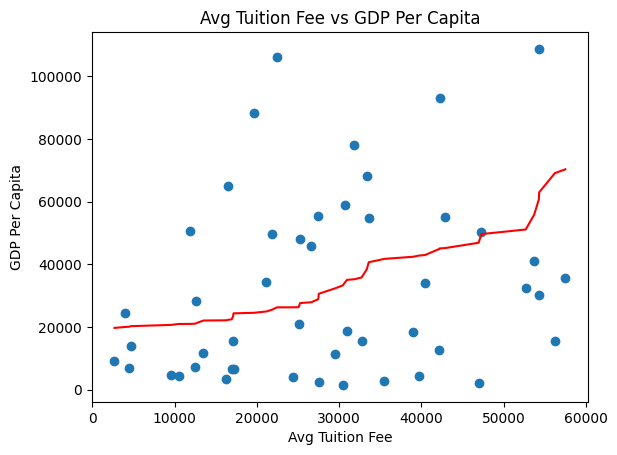

In [82]:
plt.title('Avg Tuition Fee vs GDP Per Capita')
plt.xlabel('Avg Tuition Fee')
plt.ylabel('GDP Per Capita')
plt.scatter(merged_df.avg_tuition, merged_df.gdp_per_capita)
plt.plot(np.unique(merged_df.avg_tuition), np.poly1d(np.polyfit(merged_df.avg_tuition, merged_df.gdp_per_capita, 1))(np.unique(merged_df.gdp_per_capita)), color='red')

from scipy.stats import pearsonr
corr = pearsonr(merged_df.avg_tuition, merged_df.gdp_per_capita)
corr

PearsonRResult(statistic=np.float64(0.03217740188092376), pvalue=np.float64(0.828121599133589))

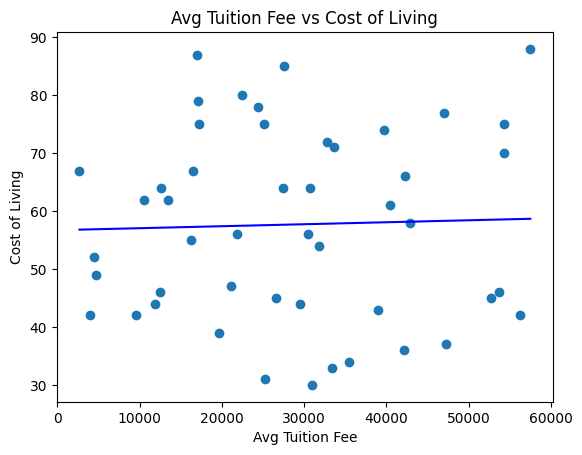

In [85]:
# Drop rows with missing values in 'avg_tuition' or 'cost_of_living'
filtered_df = merged_df.dropna(subset=['avg_tuition', 'cost_of_living'])

plt.title('Avg Tuition Fee vs Cost of Living')
plt.xlabel('Avg Tuition Fee')
plt.ylabel('Cost of Living')
plt.scatter(filtered_df.avg_tuition, filtered_df.cost_of_living)
plt.plot(
	np.unique(filtered_df.avg_tuition),
	np.poly1d(np.polyfit(filtered_df.avg_tuition, filtered_df.cost_of_living, 1))(np.unique(filtered_df.avg_tuition)),
	color='blue'
)

from scipy.stats import pearsonr
corr = pearsonr(filtered_df.avg_tuition, filtered_df.cost_of_living)
corr

PearsonRResult(statistic=np.float64(0.03217740188092376), pvalue=np.float64(0.828121599133589))

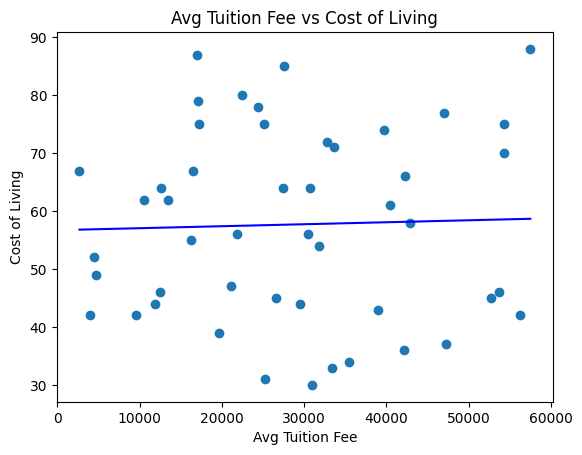

In [ ]:
# Drop rows with missing values in 'avg_tuition' or 'cost_of_living'
filtered_df = merged_df.dropna(subset=['avg_tuition', 'cost_of_living'])

plt.title('Avg Tuition Fee vs Cost of Living')
plt.xlabel('Avg Tuition Fee')
plt.ylabel('Cost of Living')
plt.scatter(filtered_df.avg_tuition, filtered_df.cost_of_living)
plt.plot(
	np.unique(filtered_df.avg_tuition),
	np.poly1d(np.polyfit(filtered_df.avg_tuition, filtered_df.cost_of_living, 1))(np.unique(filtered_df.avg_tuition)),
	color='blue'
)

from scipy.stats import pearsonr
corr = pearsonr(filtered_df.avg_tuition, filtered_df.cost_of_living)
corr